In [ ]:
# !pip install -r requirements.txt

# A. Manipular dados numéricos para algoritmos de Machine Learning



## A.1 O que é uma feature e a sua relação com os modelos de machine learning

Uma feature, ou característica, é uma propriedade individual medível ou observável de um fenômeno sendo observado. No contexto de machine learning, uma feature é uma entrada para o modelo que contribui para a tomada de decisão ou para a previsão. Em termos mais práticos, as features podem ser vistas como colunas em uma tabela de dados, onde cada coluna representa um tipo específico de informação (como altura, peso, idade, etc.) que pode ser usada para prever um resultado (como o risco de uma doença, a classificação de um documento, etc.).

Features podem ser quantitativas (numéricas) ou qualitativas (categóricas). A escolha e a qualidade das features são cruciais, pois impactam diretamente a capacidade do modelo de aprender padrões e realizar previsões precisas. A engenharia de features, que envolve a criação, transformação e seleção de features, é uma etapa essencial no desenvolvimento de modelos eficazes.

## A.2 Escalares, vetores e espaços

1. **Escalares**: Um escalar é um único valor numérico que pode ser um número real ou complexo. Ele representa uma quantidade unidimensional. Em machine learning, um escalar pode representar uma única medida ou valor, como a temperatura em um dado dia. Em álgebra linear, é frequentemente usado para multiplicar vetores e matrizes, alterando seu tamanho mas não sua direção.

2. **Vetores**: Um vetor é uma quantidade que possui tanto magnitude quanto direção. Em machine learning, um vetor é uma sequência de números (escalares) dispostos em uma determinada ordem e frequentemente usados para representar uma amostra de dados, onde cada elemento do vetor é uma feature. Por exemplo, um vetor pode representar as características (features) de um paciente, como [idade, peso, pressão arterial]. E ainda um vetor em um espaço tridimensional pode ser representado como $[x, y, z]$ .

3. **Espaços**: Em matemática, um espaço é um conjunto de vetores. Um espaço, especificamente um espaço vetorial, é um conjunto de vetores que podem ser adicionados uns aos outros e multiplicados por escalares para formar novos vetores dentro do mesmo espaço. Em machine learning, um espaço de features é o conjunto de todas as possíveis combinações de valores das features. Um vetor em um espaço de features representa uma amostra de dados, e a dimensionalidade do espaço corresponde ao número de features. Em machine learning, o espaço vetorial das features é onde as operações de modelagem acontecem. Este espaço pode ser de alta dimensão dependendo do número de features usadas.


## Binning, discretização ou Agrupamento



### A.3 Discretização de variáveis contínuas por meio de quantização com bins fixos

A discretização de variáveis contínuas é o processo de converter variáveis contínuas em variáveis discretas dividindo o intervalo contínuo em partes distintas chamadas "bins". Isso pode ser feito de várias maneiras, uma das quais é utilizando bins de largura fixa.

**Exemplo em Python usando `pd.cut`:**

In [34]:
import numpy as np
import pandas as pd

# Dados de exemplo
dados = np.random.rand(100) * 100  # 100 valores aleatórios entre 0 e 100

# Discretização com bins de largura fixa
bins = np.linspace(0, 100, 11)  # 10 bins de largura 10
labels = [f'Bin {i}' for i in range(1, len(bins))]
dados_discretizados = pd.cut(dados, bins=bins, labels=labels)

print(dados_discretizados)

['Bin 7', 'Bin 4', 'Bin 2', 'Bin 7', 'Bin 9', ..., 'Bin 7', 'Bin 7', 'Bin 1', 'Bin 6', 'Bin 6']
Length: 100
Categories (10, object): ['Bin 1' < 'Bin 2' < 'Bin 3' < 'Bin 4' ... 'Bin 7' < 'Bin 8' < 'Bin 9' < 'Bin 10']


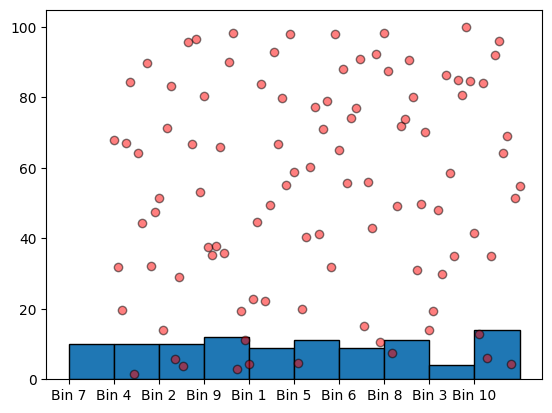

In [35]:
import matplotlib.pyplot as plt

bins =np.linspace(0,10,11)
plt.hist(dados_discretizados, bins=bins, edgecolor='k')
plt.scatter(np.linspace(1,10,100), dados, alpha=0.5, c='red', edgecolors='k')
plt.show()

**Exemplo em Python usando `np.digitize`:**

In [35]:
import numpy as np
import pandas as pd

# Dados contínuos de exemplo
dados = np.random.randn(1000)

# Discretização em 10 bins fixos
bins = np.linspace(np.min(dados), np.max(dados), 11)
dados_discretizados = np.digitize(dados, bins)

# Exibir os primeiros 10 dados discretizados
print(dados_discretizados[:10])

[6 4 5 7 1 6 5 6 8 3]


In [10]:
import numpy as np
import pandas as pd

# Gerar dados contínuos de exemplo
data = np.random.randn(1000)
# Discretizar os dados em bins fixos
bins = np.linspace(-3, 3, 21)

digitized = np.digitize(data, bins)

df = pd.DataFrame({'Data': data, 'Digitized': digitized})
print(df.head(40))

        Data  Digitized
0   0.919052         14
1  -0.726624          8
2  -1.162090          7
3   0.594868         12
4   0.636628         13
5  -0.396675          9
6   0.467916         12
7  -0.616939          8
8  -0.119856         10
9  -1.721784          5
10 -1.196313          7
11 -0.562479          9
12 -1.028785          7
13  0.622541         13
14 -0.504349          9
15 -0.569871          9
16  0.964153         14
17 -0.872785          8
18  0.082293         11
19  1.916528         17
20  1.506173         16
21  0.581682         12
22 -1.000842          7
23 -0.320716          9
24  0.411699         12
25  0.068944         11
26 -0.450129          9
27 -0.385028          9
28 -0.670549          8
29  0.644110         13
30  1.104224         14
31 -0.103621         10
32 -1.042038          7
33 -0.564744          9
34 -0.419079          9
35 -0.488802          9
36  1.247562         15
37 -0.936889          7
38 -0.491801          9
39  0.119390         11


### A.4 Discretização de variáveis contínuas por meio de quantização com bins variáveis

A discretização com bins variáveis, ou "quantiles", divide os dados em intervalos de tal forma que cada bin contém aproximadamente o mesmo número de pontos de dados.

**Exemplo em Python:**

In [36]:
import numpy as np
import pandas as pd

# Dados contínuos de exemplo
dados = np.random.randn(1000)

# Discretização em 10 bins variáveis
dados_discretizados, bins = pd.qcut(dados, q=10, retbins=True, labels=False)

# Exibir os primeiros 10 dados discretizados
print(dados_discretizados[:10])

[9 0 3 0 4 9 7 1 2 3]


In [ ]:
import numpy as np
import pandas as pd

# Gerar dados contínuos de exemplo
data = np.random.randn(1000)
# Discretizar os dados em bins variáveis (quantis)
bins = np.percentile(data, [0, 25, 50, 75, 100])
digitized = np.digitize(data, bins)

df = pd.DataFrame({'Data': data, 'Digitized': digitized})
print(df.head())

       Data  Digitized
0  0.585861          3
1  1.348231          4
2 -0.906309          1
3 -1.374753          1
4  0.424342          3


### A.5 Utilizar a FunctionTransformer do sklearn em uma variável

A `FunctionTransformer` permite aplicar qualquer função de transformação aos dados, aplicando uma função customizada. Pode ser útil para aplicar transformações que não estão diretamente disponíveis nas outras classes de transformação do scikit-learn.

**Exemplo em Python:**

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Dados de exemplo
dados = np.array([[1, 2], [3, 4], [5, 6]])

# Função customizada: quadrado dos valores
transformer = FunctionTransformer(np.square)
dados_transformados = transformer.transform(dados)

print(dados_transformados)

[[ 1  4]
 [ 9 16]
 [25 36]]


In [37]:
from sklearn.preprocessing import FunctionTransformer

# Dados de exemplo
dados = np.array([[0, 1], [2, 3], [4, 5]])

# Função de transformação: logaritmo natural
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados)

# Exibir os dados transformados
print(dados_transformados)

[[0.         0.69314718]
 [1.09861229 1.38629436]
 [1.60943791 1.79175947]]



#### A.5.1. Transformações Logarítmicas
Transformações logarítmicas podem ajudar a lidar com distribuições altamente assimétricas e reduzir a variabilidade dos dados.

Comprime o intervalo de números grandes e expande o intervalo de números pequenos.

In [ ]:
import numpy as np
import pandas as pd

# Exemplo de dados com distribuição assimétrica
data = pd.DataFrame({'feature': [1, 10, 100, 1000, 10000]})

# Aplicar transformação logarítmica
data['log_feature'] = np.log1p(data['feature'])

print(data)

   feature  log_feature
0        1     0.693147
1       10     2.397895
2      100     4.615121
3     1000     6.908755
4    10000     9.210440


#### A.5.2. Transformações de Raiz Quadrada
A transformação de raiz quadrada pode estabilizar variâncias em conjuntos de dados com distribuições assimétricas.

In [ ]:
import numpy as np
import pandas as pd

# Exemplo de dados
data = pd.DataFrame({'feature': [1, 10, 100, 1000, 10000]})

# Aplicar transformação de raiz quadrada
data['sqrt_feature'] = np.sqrt(data['feature'])

print(data)

   feature  sqrt_feature
0        1      1.000000
1       10      3.162278
2      100     10.000000
3     1000     31.622777
4    10000    100.000000


### A.6. Utilizar a PowerTransformer do sklearn em uma variável

A `PowerTransformer` aplica uma transformação de potência (Box-Cox ou Yeo-Johnson) para estabilizar a variância e tornar os dados mais gaussianos.

**Exemplo em Python:**

In [ ]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Dados de exemplo
dados = np.random.rand(100, 1) * 100  # 100 valores aleatórios entre 0 e 100

# Aplicar PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
dados_transformados = pt.fit_transform(dados)


print(dados_transformados)

[[-1.02693441]
 [ 0.37888406]
 [-0.64599735]
 [-0.96359036]
 [ 0.67860112]
 [-1.05379402]
 [-0.79307006]
 [-0.55396466]
 [-0.35281005]
 [-1.68541661]
 [ 1.29062762]
 [-1.26860522]
 [ 0.74600449]
 [-1.80954146]
 [ 1.4816037 ]
 [ 0.18633441]
 [-0.41323715]
 [-0.09164059]
 [ 0.42524267]
 [ 0.54998104]
 [ 0.74223127]
 [ 1.49743481]
 [-1.4287893 ]
 [ 0.49663459]
 [-0.2205635 ]
 [ 1.44124431]
 [-0.12763698]
 [ 1.0505485 ]
 [ 0.88843743]
 [-0.57974605]
 [-2.11571562]
 [-1.18681118]
 [-0.96414228]
 [ 0.79313986]
 [ 0.8632204 ]
 [ 0.9244199 ]
 [-0.96101203]
 [ 0.71495988]
 [-0.20104715]
 [-0.5488158 ]
 [-0.34738251]
 [-0.96822851]
 [ 1.36863448]
 [-1.17118311]
 [ 1.39102445]
 [-1.95649876]
 [ 0.72986378]
 [ 1.26289645]
 [ 0.62491932]
 [-0.97880458]
 [ 0.5047095 ]
 [ 1.42467179]
 [ 0.72206158]
 [-1.41599623]
 [-0.24749114]
 [ 1.25867409]
 [-1.04390295]
 [-1.44476772]
 [-1.81092933]
 [ 1.02606603]
 [-1.02222391]
 [ 0.15608939]
 [ 0.29198206]
 [-0.84363885]
 [ 0.84819734]
 [-0.69607395]
 [ 0.41307

## Ajuste de Escala
- Ajustar a escala dos dados é importante para garantir que todas as features contribuam de maneira equilibrada para o modelo.


### A.7 Utilizar a normalização Min-Max do sklearn para garantir que os dados estão na mesma faixa-dinâmica

A normalização Min-Max escala os dados para que estejam dentro de um intervalo especificado, geralmente [0, 1].

O escalonamento de características é uma etapa fundamental no pré-processamento de dados para muitos algoritmos de aprendizado de máquina. Ele ajuda a padronizar o intervalo dos dados para que diferentes características contribuam de maneira justa para a modelagem. As duas técnicas populares são:

**MinMax Scaling:**
- Transforma os dados para que os valores fiquem em um intervalo definido, geralmente entre 0 e 1.
- Fórmula: $$  X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$ 

**Exemplo em Python:**

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Dados de exemplo
dados = np.array([[1, 2], [2, 3], [4, 5]])

# Aplicar MinMaxScaler
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

# Exibir os dados normalizados
print(dados_normalizados)

[[0.         0.        ]
 [0.33333333 0.33333333]
 [1.         1.        ]]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Dados de exemplo
dados = np.random.rand(100, 2) * 100  # 100 valores aleatórios entre 0 e 100

# Aplicar Min-Max Scaler
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

print(dados_normalizados)

[[0.05599116 0.        ]
 [0.22857394 0.95991146]
 [0.29076317 0.21308362]
 [0.20671434 0.17790536]
 [0.94042954 0.38358675]
 [0.82125908 0.81270747]
 [0.24392851 0.19757957]
 [0.44085211 0.96260283]
 [0.03377188 0.83815342]
 [0.94462655 0.4909235 ]
 [0.333338   0.91503715]
 [0.55781708 0.16366661]
 [0.8811734  0.55663276]
 [0.3462696  0.43545456]
 [0.93299112 0.40548671]
 [0.25047145 0.70223981]
 [0.73908116 0.24145604]
 [0.94166991 0.07068302]
 [0.17802376 0.6496362 ]
 [0.39843951 0.3098238 ]
 [0.36264303 0.13590434]
 [0.68122933 0.13365361]
 [0.94651606 0.72478487]
 [0.16627025 0.3214677 ]
 [0.81519855 0.17009394]
 [0.43032578 0.26347933]
 [0.48100596 0.70579624]
 [0.27439874 0.75091953]
 [0.79888163 0.54752255]
 [0.3475474  0.72839996]
 [0.17478281 0.39232213]
 [0.52535058 0.3204416 ]
 [0.66813642 0.06768802]
 [0.53444323 0.18232382]
 [0.76180315 0.9418155 ]
 [0.83386294 0.34147325]
 [0.30202481 0.18900801]
 [0.89155617 0.32605228]
 [0.65200469 0.39278531]
 [0.16778362 0.55423534]


In [ ]:
from sklearn import preprocessing
import numpy as np

# Dados de exemplo
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

# Aplicar Min-Max Scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

print(X_train_minmax)

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Dados de exemplo
dados = np.random.rand(100, 2) * 100  # 100 valores aleatórios entre 0 e 100

# Aplicar Min-Max Scaler
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

print(dados_normalizados)

[[0.20910732 0.73965727]
 [0.03206201 0.27051212]
 [0.86087612 0.59423497]
 [0.34693995 0.49871251]
 [0.89987324 0.18820996]
 [0.27040114 0.39336815]
 [0.59273054 0.40607719]
 [0.40696168 0.30141578]
 [0.76677949 0.41751495]
 [0.94584043 0.4506106 ]
 [0.37449353 0.99320806]
 [0.99048986 0.16808314]
 [0.45808735 0.35376673]
 [0.60428117 0.63443059]
 [0.54232974 0.25303889]
 [0.18492299 0.4521966 ]
 [0.56463117 0.25577595]
 [0.78307415 0.33296075]
 [1.         0.94493962]
 [0.86960155 0.63276484]
 [0.02168494 0.33852827]
 [0.55957432 0.        ]
 [0.24339807 0.53924807]
 [0.35041591 0.57381435]
 [0.20172551 0.31602608]
 [0.04118181 0.3882013 ]
 [0.68070678 0.29069064]
 [0.86874273 0.53047162]
 [0.69645098 0.17330847]
 [0.40633642 0.22259053]
 [0.47594195 0.75870544]
 [0.10175818 0.30437883]
 [0.76109304 0.93235765]
 [0.91237653 0.87092529]
 [0.37523126 0.9877602 ]
 [0.35254266 0.06510589]
 [0.08723202 0.68966654]
 [0.94810202 0.85358139]
 [0.60683217 1.        ]
 [0.79335595 0.61124385]


### A.8 Utilizar a normalização Standard Scaler

A normalização `StandardScaler` padroniza os dados removendo a média e escala os dados para que tenham média igual a 0 e desvio padrão 1.

**Standard (Z) Scaling:**

- Fórmula: $$  X_{\text{scaled}} = \frac{X - \text{mean}(X)}{\text{std}(X)} $$ 
- Usado quando a distribuição dos dados é normal ou próxima da normal.

**Exemplo em Python:**

In [40]:
from sklearn.preprocessing import StandardScaler

# Dados de exemplo
dados = np.array([[1, 2], [2, 3], [4, 5]])

# Aplicar StandardScaler
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados)

# Exibir os dados normalizados
print(dados_normalizados)

[[-1.06904497 -1.06904497]
 [-0.26726124 -0.26726124]
 [ 1.33630621  1.33630621]]


In [ ]:
from sklearn import preprocessing
import numpy as np

# Dados de exemplo
X = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

# Aplicar a padronização
X_scaled = preprocessing.scale(X)

print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


### A.9 Utilizar a regularização norma-l2

A regularização L2 adiciona uma penalidade igual ao quadrado da magnitude dos coeficientes do modelo linear para evitar overfitting. Em termos de manipulação de dados, isso não afeta diretamente a transformação dos dados, mas sim o processo de ajuste do modelo.

![alt text](0_Rw_bC-1ByKfHvELn.webp)

$$ l1, Lasso: soma dos quadrados dos resíduos + penalidade * | inclinação | $$

![alt text](0_Zy-M3ejNdZxpeIv6.webp)

$$ l2, Ridge: soma dos quadrados dos resíduos + penalidade * (inclinação)² $$

![alt text](0_Sxd9ERNyv-yrKGvd.webp)

![alt text](0_Wlq4yf-bvJWSy7Oo.webp)


**Exemplo usando `Ridge` do sklearn:**

In [41]:
from sklearn.linear_model import Ridge

# Dados de exemplo (X: features, y: target)
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

# Aplicar Ridge Regression com regularização L2
model = Ridge(alpha=1.0)
model.fit(X, y)

# Coeficientes do modelo
print(model.coef_)

[0.8 1.4]


In [ ]:
import numpy as np
from sklearn.linear_model import Ridge

# Dados de exemplo
X = np.random.rand(100, 2)  # 100 exemplos, 2 features
y = np.random.rand(100)  # 100 valores alvo

# Aplicar Ridge Regression com regularização L2
modelo = Ridge(alpha=1.0)
modelo.fit(X, y)

print(modelo.coef_)

[-0.07038194  0.17457162]


## A.10. Selecionar as features úteis para o modelo usando uma das três técnicas: Filtragem, Wrapper e Embedding

A seleção de características é um passo crítico no pré-processamento de dados para aprendizado de máquina. Reduz a complexidade do modelo, diminui o tempo de treinamento e pode melhorar o desempenho do modelo ao eliminar características irrelevantes ou redundantes. Existem três abordagens principais para a seleção de características: Filtragem, Métodos Wrapper e Métodos Embutidos.


- **Filtragem:** Seleciona as features com base em estatísticas univariadas, como a correlação.
- **Wrapper:** Usa um modelo de machine learning para avaliar a importância de cada subset de features.
- **Embedding:** As features são selecionadas durante o treinamento do modelo, como nos modelos baseados em árvores.




#### A.10.1 Filtragem
A abordagem de filtragem envolve a avaliação de cada característica individualmente em relação à variável de resposta e a seleção das características mais relevantes. Métodos comuns incluem:
- **Correlação:** Mede a relação linear entre a característica e a variável de resposta. Características com alta correlação positiva ou negativa podem ser selecionadas.
- **Informação Mútua:** Mede a dependência mútua entre a característica e a variável de resposta. Características com alta informação mútua são preferidas

1. **Filtragem**: Seleção de features baseada em métodos estatísticos. 
   
- Exemplo com `SelectKBest`:


In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

# Dados de exemplo (X: features, y: target)
X = np.random.randn(100, 10)
y = np.random.randint(0, 2, 100)

# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Features selecionadas
print(X_new.shape)

(100, 5)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Carregar dados de exemplo
iris = load_iris()
X, y = iris.data, iris.target

# Selecionar as 2 melhores features
selector = SelectKBest(score_func=f_classif, k=2)
X_novas = selector.fit_transform(X, y)

print(X_novas)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]


Exemplo de uso de correlação em Python:

In [ ]:
import pandas as pd

# Dados de exemplo
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [1, 2, 3, 4, 5]
})

# Calcular a correlação entre características e a variável de resposta
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending=False))

feature1    1.0
target      1.0
feature2   -1.0
Name: target, dtype: float64


#### A.10.2 Métodos Wrapper

Os métodos wrapper avaliam várias combinações de características e selecionam a combinação que resulta no melhor desempenho do modelo. São computacionalmente caros, mas podem ser muito eficazes. Um exemplo comum é a Regressão Stepwise.

2. **Wrapper**: Seleção de features usando um modelo preditivo. Exemplo com `RFE`:

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Dados de exemplo (X: features, y: target)
X = np.random.randn(100, 10)
y = np.random.randint(0, 2, 100)

# Aplicar RFE com Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_new = rfe.fit_transform(X, y)

# Features selecionadas
print(X_new.shape)

(100, 5)


Exemplo de uso de um método wrapper em Python (Sequential Feature Selector):

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Dados de exemplo
X = df[['feature1', 'feature2']]
y = df['target']

# Modelo base
model = LinearRegression()

# Sequential Feature Selector
sfs = SequentialFeatureSelector(model, n_features_to_select=1, direction='forward')
sfs.fit(X, y)

print(sfs.get_support())  # Características selecionadas

[ True False]


c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\sit

#### A.10.3 Métodos Embutidos

Os métodos embutidos realizam a seleção de características durante o processo de treinamento do modelo. Exemplos incluem Árvores de Decisão e Florestas Aleatórias, que calculam a importância das características durante o ajuste do modelo.


3. **Embedding**: Seleção de features integrada ao processo de treinamento. Exemplo com `Lasso`:

In [44]:
from sklearn.linear_model import Lasso

# Dados de exemplo (X: features, y: target)
X = np.random.randn(100, 10)
y = np.random.randn(100)

# Aplicar Lasso para seleção de features
model = Lasso(alpha=0.1)
model.fit(X, y)

# Coeficientes do modelo
print(model.coef_)

[ 0.          0.03439734  0.          0.          0.          0.08056253
  0.          0.          0.13757697 -0.        ]


Exemplo de uso de uma Árvore de Decisão em Python:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Modelo de Árvore de Decisão
model = DecisionTreeRegressor()

# Ajuste do modelo
model.fit(X, y)

# Importâncias das características
importances = model.feature_importances_
print(importances)

[0.95 0.05]


Exemplo de uso de Floresta Aleatória em Python:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

print(importances)

[0.08491853 0.10112385 0.08774692 0.09716454 0.08359146 0.12087978
 0.08468217 0.12909016 0.13607203 0.07473056]


## A.11. Advanced Feature Selection (Seleção de Características Avançadas)

#### A.11.1. Filtragem
A abordagem de filtragem envolve a avaliação de cada característica individualmente em relação à variável de resposta e a seleção das características mais relevantes. Métodos comuns incluem:
- **Correlação:** Mede a relação linear entre a característica e a variável de resposta. Características com alta correlação positiva ou negativa podem ser selecionadas.
- **Informação Mútua:** Mede a dependência mútua entre a característica e a variável de resposta. Características com alta informação mútua são preferidas.

Exemplo de uso de correlação em Python:

In [ ]:
import pandas as pd

# Dados de exemplo
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [1, 2, 3, 4, 5]
})

# Calcular a correlação entre características e a variável de resposta
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending=False))

feature1    1.0
target      1.0
feature2   -1.0
Name: target, dtype: float64


#### A.11.2 Métodos Wrapper
Os métodos wrapper avaliam várias combinações de características e selecionam a combinação que resulta no melhor desempenho do modelo. São computacionalmente caros, mas podem ser muito eficazes. Um exemplo comum é a Regressão Stepwise.

Exemplo de uso de um método wrapper em Python (Sequential Feature Selector):

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Dados de exemplo
X = df[['feature1', 'feature2']]
y = df['target']

# Modelo base
model = LinearRegression()

# Sequential Feature Selector
sfs = SequentialFeatureSelector(model, n_features_to_select=1, direction='forward')
sfs.fit(X, y)

print(sfs.get_support())  # Características selecionadas

[ True False]


c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\dacio\OneDrive\INFNET\machineLearning\.venv\Lib\sit

#### A.11.3. Métodos Embutidos
Os métodos embutidos realizam a seleção de características durante o processo de treinamento do modelo. Exemplos incluem Árvores de Decisão e Florestas Aleatórias, que calculam a importância das características durante o ajuste do modelo.

Exemplo de uso de uma Árvore de Decisão em Python:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Modelo de Árvore de Decisão
model = DecisionTreeRegressor()

# Ajuste do modelo
model.fit(X, y)

# Importâncias das características
importances = model.feature_importances_
print(importances)

[0.95 0.05]


##### 5.2.1. Seleção Univariada com SelectKBest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Carregar o dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Selecionar as 2 melhores features
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

print("Features Selecionadas:\n", X_new[:5])

Features Selecionadas:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


##### 5.2.2. Utilizando o Método de Variância

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Carregar o dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Aplicar threshold de variância
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X)

print("Features Selecionadas:\n", X_new[:5])

Features Selecionadas:
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]


#### 5.3. Wrapper
As técnicas de Wrapper utilizam um modelo preditivo para avaliar a combinação de features, selecionando o subconjunto que resulta na melhor performance do modelo.

##### 5.3.1. Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Carregar o dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Criar o modelo de Regressão Logística
model = LogisticRegression(max_iter=200)

# Aplicar RFE para selecionar 2 melhores features
rfe = RFE(estimator=model, n_features_to_select=2)
X_new = rfe.fit_transform(X, y)

print("Features Selecionadas:\n", X_new[:5])

Features Selecionadas:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


#### 5.4. Embedding
As técnicas de Embedding integram a seleção de features no próprio processo de treinamento do modelo. Algoritmos como Random Forest e Lasso Regression podem ser utilizados para este propósito.

##### 5.4.1. Utilizando Random Forest

In [31]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Carregar o dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Treinar um modelo Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Importância das features
importances = model.feature_importances_
feature_names = iris.feature_names

# Criar um DataFrame para visualização
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

             Feature  Importance
3   petal width (cm)    0.451180
2  petal length (cm)    0.443655
0  sepal length (cm)    0.084342
1   sepal width (cm)    0.020823
